### Task 1

In [33]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### Task 2

In [34]:
#looking at the data structure
X.head(), X.info(), X.describe(), X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


(   age         workclass  fnlwgt  education  education-num  \
 0   39         State-gov   77516  Bachelors             13   
 1   50  Self-emp-not-inc   83311  Bachelors             13   
 2   38           Private  215646    HS-grad              9   
 3   53           Private  234721       11th              7   
 4   28           Private  338409  Bachelors             13   
 
        marital-status         occupation   relationship   race     sex  \
 0       Never-married       Adm-clerical  Not-in-family  White    Male   
 1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
 2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
 3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
 4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
 
    capital-gain  capital-loss  hours-per-week native-country  
 0          2174             0              40  United-States  
 1             0             0          

Task 2.1

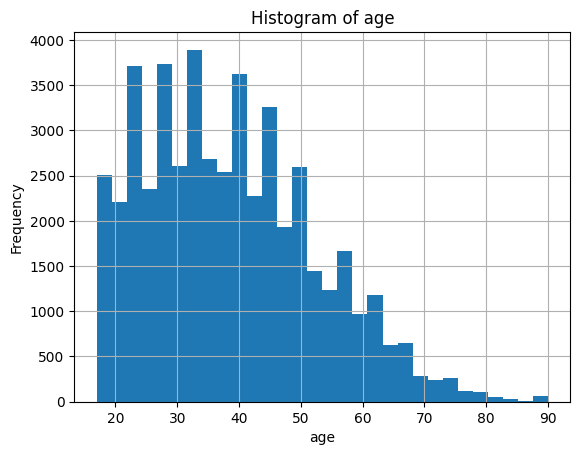

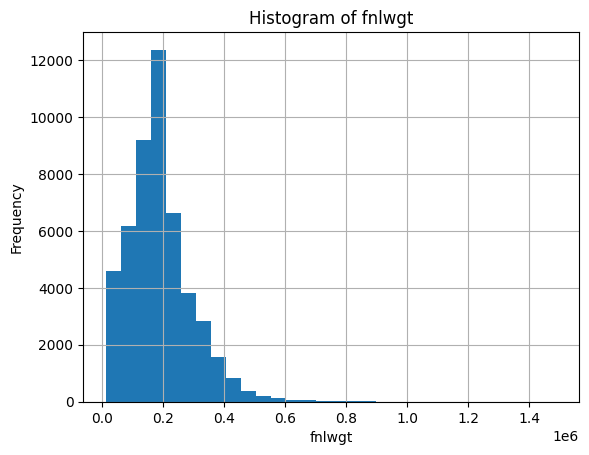

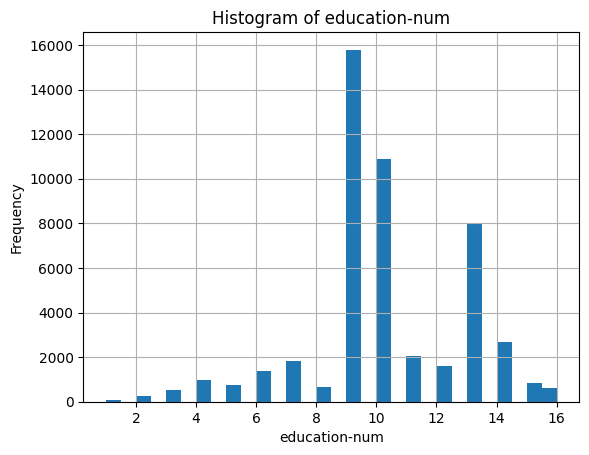

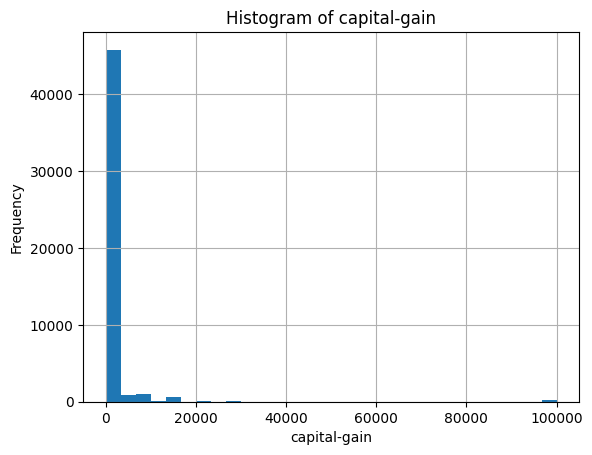

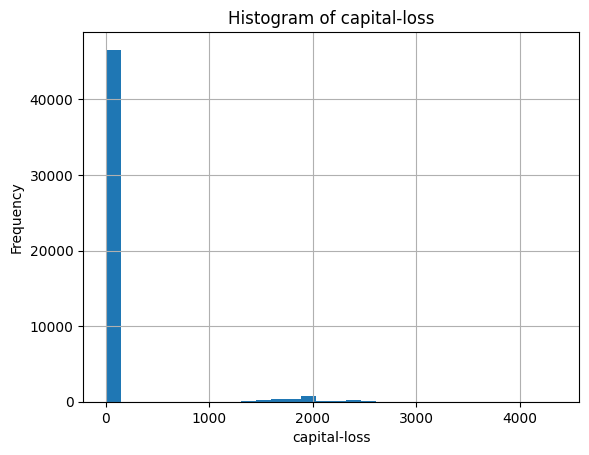

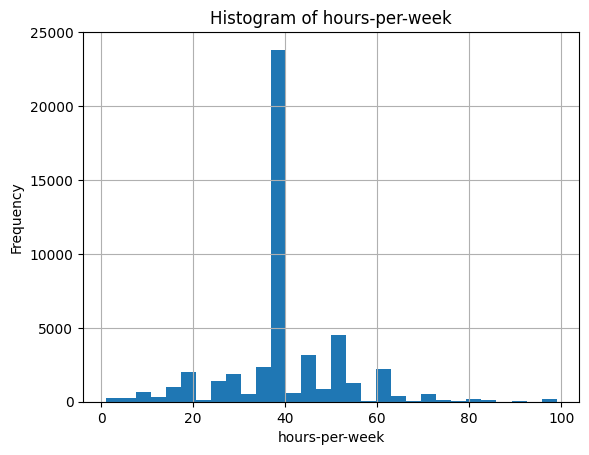

In [35]:
import matplotlib.pyplot as plt

# Plotting histograms for numeric columns
#selecting numeric datatype
integer_columns = X.select_dtypes(include=['int64']).columns

#check all the numeric columns
for i in integer_columns:
    plt.figure()
    X[i].hist(bins=30)
    #print title for each of the histograms
    plt.title(f'Histogram of {i}')
    # x axis should have a same name as col
    plt.xlabel(i)
    # y axis name should be frequency
    plt.ylabel('Frequency')
    #show the histogram
    plt.show()




### Task 3

In [36]:
import pandas as pd
#look for mssing values
number_of_missing_values = (X == "?").sum()
#print missing values
print(number_of_missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64


### Task 4

In [37]:
import numpy as np

#replaces the missing values with null
X.replace('?', np.nan, inplace=True)

#run X.info() to see the null count
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


<ipython-input-37-207f905feab1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)


# Task 5


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Creating a pipeline for numerical data types
integer_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])

# Creating a pipeline for categorical data types
categorical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

#selecting numeric datatype
integer_columns = X.select_dtypes(include=['int64']).columns
#selecting categorical datatype
categorical_columns = X.select_dtypes(include=['object','category']).columns


# adding pipelines together
adding_pipelines = ColumnTransformer(transformers=[('num', integer_pipeline, integer_columns),('cat', categorical_pipeline, categorical_columns)])

# Adding pipelines to the dataset
X_prepared = adding_pipelines.fit_transform(X)

# Displaying the pipeline
print("Pipeline:", adding_pipelines)

# Print prepared shape
print("Shape of X_prepared:", X_prepared.shape)



Pipeline: ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])
Shape of X_prepared: (48842, 105)


# Task 6


In [39]:
# Checking the target value counts
value_counts = y.value_counts()
#print value_counts
print(value_counts)


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64


# Task 7

In [40]:
# remove the . from >50k and <=50k
y_adjusted = y.replace({'>50K.': '>50K', '<=50K.': '<=50K'})

#get the new value_counts
value_counts = y_adjusted.value_counts()
#print the value_counts
print(value_counts)


income
<=50K     37155
>50K      11687
dtype: int64


# Task 8

In [41]:
from sklearn.model_selection import train_test_split

# Split the data in 80% training set and 20% training set
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_adjusted, test_size=0.2, random_state=42)

# print the shape of X_train, x_test, y_train, y_test
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(39073, 105) (39073, 1) (9769, 105) (9769, 1)


# Task 9

In [42]:
from sklearn.svm import SVC

#Trainin svm model using kernel = poly, gamma = 1, c = 0.1
svm_model = SVC(kernel='poly', gamma=1, C=0.1)
svm_model.fit(X_train[:10000], y_train[:10000].values.ravel())


SVC(C=0.1, gamma=1, kernel='poly')

Task 9.1

In [43]:
from sklearn.metrics import classification_report

# Test the model on X_Test
y_predict = svm_model.predict(X_test)

# result of the classification report
result = classification_report(y_test, y_predict)
print(result)


              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



Task 9.2

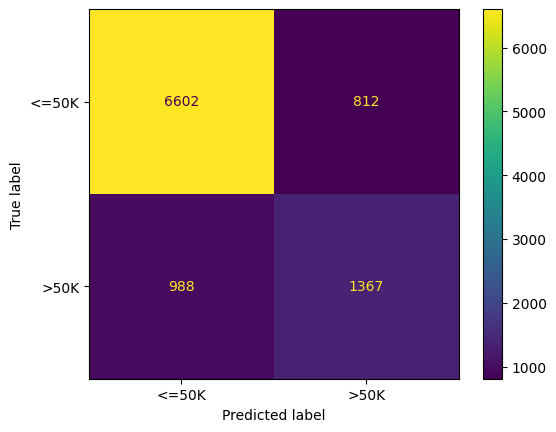

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix of the test results
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
#show the results
plt.show()


# Task 10

Task 10.1

In [45]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into 60% training and 40%(20% validation, 20% testing)
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y_adjusted, test_size=0.4, random_state=42)

#Splitting the test set into 50% validation and 50% test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

# Printing the shapes

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)


(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# code author luiguiserrano
# svm parameters
svm_parameters = {
    'kernel': ['rbf'],
    'gamma': [0.01, 0.1, 1 , 10],
    'C': [0.01, 1, 10]
}

svm = SVC()
# Grid Search
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)


svm_gs.fit(X_train[:10000], y_train[:10000].values.ravel())

# Printing the best value of kernel, gamma, and C
print("Best values:", svm_gs.best_params_)



Best values: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


10.2

In [47]:


svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)


0.8490990990990991